Logistic Regression Accuracy per fold: [0.97222222 0.97222222 0.97222222 1.         1.        ]
Logistic Regression Average Accuracy: 98.33%

SVM (Linear) Accuracy per fold: [0.97222222 0.97222222 0.94444444 0.97142857 0.97142857]
SVM (Linear) Average Accuracy: 96.63%

Decision Tree Accuracy per fold: [0.88888889 0.91666667 0.88888889 0.82857143 0.94285714]
Decision Tree Average Accuracy: 89.32%

Random Forest Accuracy per fold: [0.97222222 1.         0.97222222 0.94285714 1.        ]
Random Forest Average Accuracy: 97.75%

K-Nearest Neighbors Accuracy per fold: [0.97222222 0.97222222 1.         0.94285714 0.97142857]
K-Nearest Neighbors Average Accuracy: 97.17%

Naive Bayes Accuracy per fold: [0.94444444 1.         0.97222222 0.94285714 1.        ]
Naive Bayes Average Accuracy: 97.19%



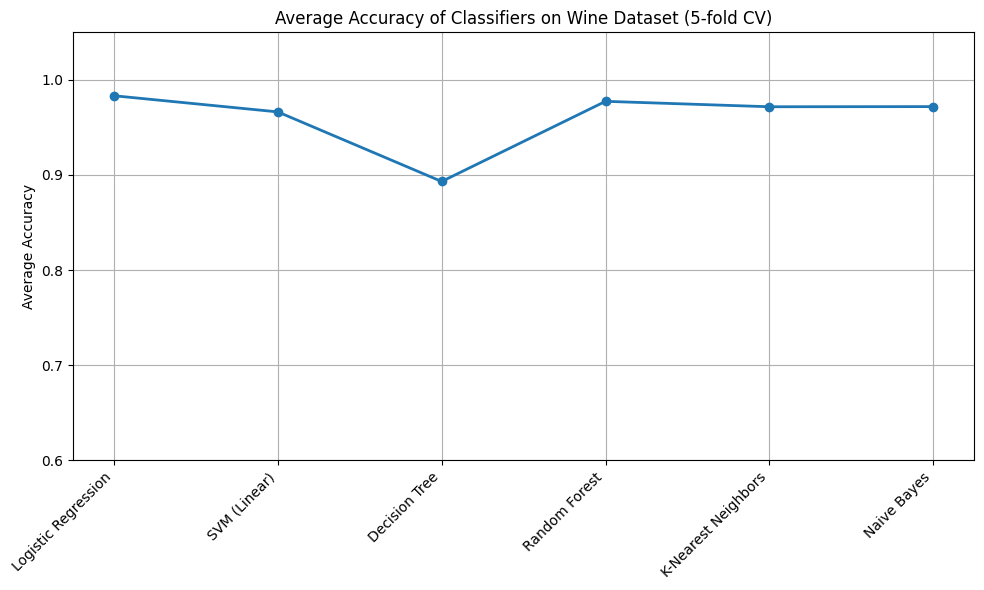

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

df = pd.DataFrame(X, columns=feature_names)
df['class'] = pd.Categorical.from_codes(y, target_names)

k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

classifiers = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42)),
    "SVM (Linear)": make_pipeline(StandardScaler(), SVC(kernel='linear')),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "K-Nearest Neighbors": make_pipeline(StandardScaler(), KNeighborsClassifier()),
    "Naive Bayes": GaussianNB()
}

results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=kf)
    results[name] = scores
    print(f"{name} Accuracy per fold: {scores}")
    print(f"{name} Average Accuracy: {np.mean(scores)*100:.2f}%\n")

avg_scores = [np.mean(results[name]) for name in classifiers.keys()]
names = list(classifiers.keys())

plt.figure(figsize=(10, 6))
plt.plot(names, avg_scores, marker='o', linewidth=2)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy of Classifiers on Wine Dataset (5-fold CV)')
plt.ylim(0.6, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()
